# Stock Active Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2022-07-01' #input
symbol1 = '^NSEI' #input
symbol2 = 'RELIANCE.NS' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
def active_risk(stock_returns, market_returns):
    N = 14  
    ar = np.sqrt((sum((stock_returns - market_returns)**2)/(N-1)))
    return ar

Text(0, 0.5, 'Active Risk')

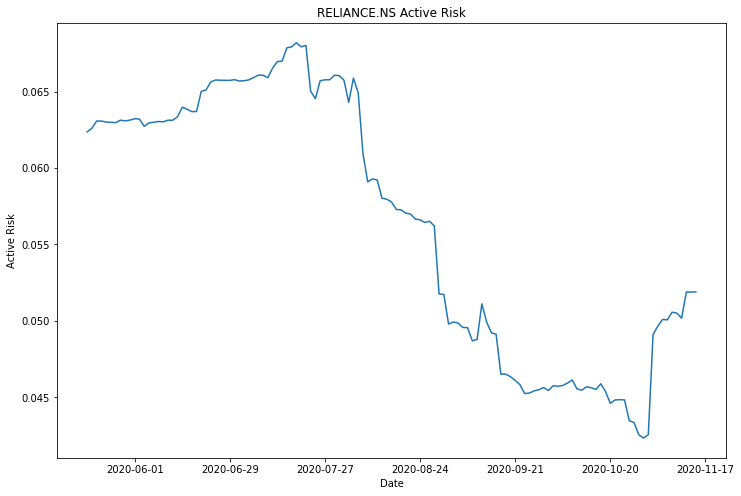

In [6]:
# Compute the running Active Risk
running = [active_risk(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Active Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol2 + ' Active Risk')
plt.xlabel('Date')
plt.ylabel('Active Risk')

In [7]:
stock_ar = active_risk(stocks_returns, market_returns)
stock_ar

nan

In [8]:
running = [active_risk(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.06235843483910206,
 0.06259603349054202,
 0.06307092790399564,
 0.06306825328858169,
 0.06300286509427187,
 0.06298646752284764,
 0.06296525320224812,
 0.06312489669980596,
 0.06308105581211432,
 0.06312862386342505,
 0.06322176784790035,
 0.06319873905992203,
 0.06272193090665773,
 0.06294547479346058,
 0.06298902575313117,
 0.06303847850609257,
 0.06302018016684194,
 0.06312351298985523,
 0.06312355622169573,
 0.06334244697873621,
 0.06396755168092622,
 0.06384147270224383,
 0.06368700705636342,
 0.06369123848831419,
 0.06500848518290624,
 0.0651013572786202,
 0.06562611552449675,
 0.06575350067671064,
 0.06573592257607497,
 0.0657304097753762,
 0.06572776078737011,
 0.06577347262976077,
 0.06568696121715997,
 0.06570270783980238,
 0.06576073574077683,
 0.06590913502451144,
 0.06607318849195593,
 0.0660625657756991,
 0.06590421883542792,
 0.06653413147645545,
 0.06695747817017668,
 0.06699036268193038,
 0.06785659158544417,
 0.06792138729172513,
 0.06819173633401704,
 0.0679209483